In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Vergleich für unterschiedliche imbalance degrees

Wir haben insgesamt 5 verschiede imbalance degrees, die wir im FOlgenden betrachten: very_low, low, normal, high und very_high.

In [2]:
import math
merged_df = pd.DataFrame()

#for max_info_loss in np.arange(0.1, 0.45, 0.05):
# info loss should now be stored in each csv file!
for imb in ['very_low', 'low', 'normal', 'high', 'very_high']:
    #max_info_loss = round(max_info_loss, 2)
    file_name = f'../paper_results/imbalance_degree/{imb}/result_split/gini_accuracy_all_runs.csv'
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name)
        df['imbalance'] = imb
        merged_df = pd.concat([df, merged_df])

    if imb == 'normal':
        print(merged_df[merged_df['imbalance'] == 'normal']['info loss'].unique())


merged_df["Method"] = merged_df["Method"].apply(lambda x: "SPH+CPI" if x=="Tailored Approach" else x)
merged_df['A@e'] = merged_df['A@e'] * 100
merged_df['Avg Acc SPH+CPI'] = merged_df['Avg Acc SPH+CPI'] * 100
merged_df = merged_df[(merged_df['imbalance'] != 'normal') | (merged_df['info loss'] !=0.3)]
print(merged_df['info loss'].unique())
print(merged_df[merged_df['info loss'].isnull()])
print(merged_df[merged_df['imbalance'] == 'normal']['info loss'].unique())
print(merged_df[merged_df['Method'] == "RF+B"].head(20))
len(merged_df)

[0.25  nan]
[0.25  nan]
     R_e        A@e Method  gini  p value  Run  SPH Executed  info loss  \
10     1  53.333333   RF+B  -1.0     -1.0  1.0          18.0        NaN   
11     2  60.000000   RF+B  -1.0     -1.0  1.0          18.0        NaN   
12     3  63.000000   RF+B  -1.0     -1.0  1.0          18.0        NaN   
13     4  65.666667   RF+B  -1.0     -1.0  1.0          18.0        NaN   
14     5  66.666667   RF+B  -1.0     -1.0  1.0          18.0        NaN   
..   ...        ...    ...   ...      ...  ...           ...        ...   
185    6  33.333333    CPI   0.4      0.9  1.0          11.0        NaN   
186    7  38.000000    CPI   0.4      0.9  1.0          11.0        NaN   
187    8  41.666667    CPI   0.4      0.9  1.0          11.0        NaN   
188    9  48.333333    CPI   0.4      0.9  1.0          11.0        NaN   
189   10  51.333333    CPI   0.4      0.9  1.0          11.0        NaN   

     SPH A@1  RF+B A@1  CPI A@1  Avg Acc SPH+CPI  imbalance  
10       NaN 

1000

In [4]:
merged_df[(merged_df['imbalance'] == 'normal') & (merged_df['R_e'] == 1)]['A@e'].describe()

count    20.000000
mean     32.500000
std       4.416211
min      24.333333
25%      30.666667
50%      32.500000
75%      34.333333
max      40.000000
Name: A@e, dtype: float64

In [ ]:
merged_df

## Hardcoded Results

In [2]:


sph_dict_very_low = {
    "imbalance": ["very_low" for _ in range(10)],
    "method": ["SPH" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [13, 21, 28, 32, 39, 45, 50, 52, 55, 57],
}

sph_dict_low = {
    "imbalance": ["low" for _ in range(10)],
    "method": ["SPH" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [24, 38, 47, 51, 55, 58, 63, 65, 67, 68],
    
}

sph_dict_normal = {
    "imbalance": ["normal" for _ in range(10)],
    "method": ["SPH" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [37, 57, 67, 73, 79, 80, 82, 83, 84, 85],
}

sph_dict_high = {
    "imbalance": ["high" for _ in range(10)],
    "method": ["SPH" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [44, 59, 66, 71, 74, 76, 77, 79, 82, 82],
}

sph_dict_very_high = {
    "imbalance": ["very_high" for _ in range(10)],
    "method": ["SPH" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [59, 64, 66, 70, 73, 75, 77, 78, 79, 80],
}
sph_results = [sph_dict_very_low, sph_dict_low, sph_dict_normal, sph_dict_high, sph_dict_very_high]
result = pd.DataFrame()
for sph_result in sph_results:
    result = pd.concat([pd.DataFrame(sph_result), result])
#pd.DataFrame(sph_results)
result

,imbalance,method,R_e,A@e,SPH Surrogates,CPI Subsets
0,very_high,SPH,1,59,18,19
1,very_high,SPH,2,64,18,19
2,very_high,SPH,3,66,18,19
3,very_high,SPH,4,70,18,19
4,very_high,SPH,5,73,18,19
5,very_high,SPH,6,75,18,19
6,very_high,SPH,7,77,18,19
7,very_high,SPH,8,78,18,19
8,very_high,SPH,9,79,18,19
9,very_high,SPH,10,80,18,19


In [11]:
#result = pd.DataFrame()

sph_cpi_dict_very_low = {
    "imbalance": ["very_low" for _ in range(10)],
    "method": ["SPH+CPI" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [13, 21, 28, 32, 39, 45, 50, 52, 55, 57]
}

sph_cpi_dict_low = {
    "imbalance": ["low" for _ in range(10)],
    "method": ["SPH+CPI" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [24, 37, 47, 51, 56, 59, 64, 66, 68, 70]
}

sph_cpi_dict_normal = {
    "imbalance": ["normal" for _ in range(10)],
    "method": ["SPH+CPI" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [40, 58, 65, 72, 79, 81, 83, 83, 85, 85]
}

sph_cpi_dict_high = {
    "imbalance": ["high" for _ in range(10)],
    "method": ["SPH+CPI" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [45, 55, 65, 71, 75, 76, 77, 79, 80, 81]
}

sph_cpi_dict_very_high = {
    "imbalance": ["very_high" for _ in range(10)],
    "method": ["SPH+CPI" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [58, 65, 66, 71, 74, 76, 78, 79, 80, 80]
}
rf_avg_a_at_e_per_degree = {}
sph_cpi_avg_a_at_e_per_degree = {"very_high": 72.70, "high": 71.37, "normal": 73.10, "low": 54.13, "very_low": 39.20}

sph_cpi_results = [sph_cpi_dict_very_low, sph_cpi_dict_low, sph_cpi_dict_normal, sph_cpi_dict_high, sph_cpi_dict_very_high]
for sph_cpi_result in sph_cpi_results:
    result = pd.concat([pd.DataFrame(sph_cpi_result), result])
    
result
print(sph_cpi_avg_a_at_e_per_degree)

{'very_high': 72.7, 'high': 71.37, 'normal': 73.1, 'low': 54.13, 'very_low': 39.2}


In [12]:
rfb_dict_very_low = {
    "imbalance": ["very_low" for _ in range(10)],
    "method": ["RF+B" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [5, 10, 15, 20, 25, 28, 35, 37, 41, 47]
}

rfb_dict_low = {
    "imbalance": ["low" for _ in range(10)],
    "method": ["RF+B" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [19, 27, 35, 41, 45, 49, 51, 55, 57, 58]
}

rfb_dict_normal = {
    "imbalance": ["normal" for _ in range(10)],
    "method": ["RF+B" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [32, 47, 58, 64, 69, 73, 75, 76, 79, 81]
}

rfb_dict_high = {
    "imbalance": ["high" for _ in range(10)],
    "method": ["RF+B" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [39, 52, 59, 66, 68, 70, 73, 75, 77, 79]
}

rfb_dict_very_high = {
    "imbalance": ["very_high" for _ in range(10)],
    "method": ["RF+B" for _ in range(10)],
    "R_e": [x for x in range(1,11)],
    "A@e": [52, 59, 62, 64, 67, 68, 70, 71, 72, 74]
}

rfb_results = [rfb_dict_very_low, rfb_dict_low, rfb_dict_normal, rfb_dict_high, rfb_dict_very_high]
rf_avg_a_at_e_per_degree = {}

for rfb_result in rfb_results:
    result = pd.concat([pd.DataFrame(rfb_result), result])
    imb = rfb_result["imbalance"][0]
    a_at_e = sum(rfb_result["A@e"])/len(rfb_result["A@e"])
    rf_avg_a_at_e_per_degree[imb] = a_at_e

result = result.rename({'method': 'Method'}, axis='columns')
print(rf_avg_a_at_e_per_degree)

{'very_low': 26.3, 'low': 43.7, 'normal': 65.4, 'high': 65.8, 'very_high': 65.9}


In [84]:
result["method"]

0    RF+B
1    RF+B
2    RF+B
3    RF+B
4    RF+B
     ... 
5     SPH
6     SPH
7     SPH
8     SPH
9     SPH
Name: method, Length: 150, dtype: object

## Accuracy für jeden imbalance degree optimiert

Jetzt schauen wir uns die Accuracy für die verschiedenen imbalance degrees an, wenn wir jeweils die Parameter für jeden einzeln optimieren

In [5]:
best_result_each_degree = pd.DataFrame()
#low_imb_df.head()
#frames = [very_low_imb_df, low_imb_df, normal_imb_df, high_imb_df, very_high_imb_df]
rf_avg_a_at_e_per_degree = {}
sph_cpi_avg_a_at_e_per_degree = {}
for imb in merged_df['imbalance'].unique():
    imb_df = merged_df[merged_df['imbalance'] == imb]
    
    sph_cpi_avg_a_at_e_per_degree[imb] =  imb_df[imb_df['Method'] == "SPH+CPI"]["Avg Acc SPH+CPI"].max()
    rf_avg_a_at_e_per_degree[imb] = imb_df[imb_df['Method'] == "RF+B"]["A@e"].mean()
    best_A_1_result = imb_df[(imb_df["R_e"]==10) & (imb_df['Method'] == "SPH+CPI")]['A@e'].max()
    
    print('------------------------------------------')
    print(imb)

    print(best_A_1_result)
    best_result = imb_df[(imb_df["Avg Acc SPH+CPI"] == imb_df["Avg Acc SPH+CPI"].max())]
    
    #best_result = imb_df[(imb_df["A@e"] == best_A_1_result) & (imb_df['Method'] == 'SPH+CPI') & (imb_df['R_e'] == 1)]
    
    best_gini = best_result["gini"].values[0]
    best_p = best_result["p value"].values[0]
    print(best_result["gini"].unique())
    print(best_result["p value"].unique())
    #print(best_result["A@e"].unique())
    best_run = 1
    best_info_loss = best_result['info loss'].values[0]    
    print(best_result["info loss"].unique())

    print(f"best run for imb degree {merged_df['imbalance'].values[0]} is: {best_run}")
    # best result for SPH+CPI
    #print(best_result)
    best_ta_methods = imb_df[(imb_df["gini"] ==best_gini) & (imb_df["info loss"] == best_info_loss) & (imb_df["Run"] == best_run) & (imb_df["p value"] == best_p)]
    best_ta_methods = best_ta_methods[(best_ta_methods["Avg Acc SPH+CPI"] == best_ta_methods["Avg Acc SPH+CPI"].max())]

    #print(best_ta_methods)
    best_result_each_degree = pd.concat([best_result_each_degree, best_ta_methods])

    
best_result_each_degree
best_result_each_degree[(best_result_each_degree['R_e'] ==1) & (best_result_each_degree['imbalance'] == 'low')]
best_result_each_degree[['A@e', 'gini', 'p value', 'imbalance', 'info loss', 'Avg Acc SPH+CPI',]][(best_result_each_degree['R_e'] == 1) & (best_result_each_degree['Avg Acc SPH+CPI'] != np.NaN)].drop_duplicates().round(2)
print(sph_cpi_avg_a_at_e_per_degree)
print(rf_avg_a_at_e_per_degree)

------------------------------------------
very_high
80.66666666666666
[0.4]
[0.8]
[0.25]
best run for imb degree very_high is: 1
------------------------------------------
high
80.0
[0.35]
[0.8]
[0.25]
best run for imb degree very_high is: 1
------------------------------------------
normal
86.33333333333333
[0.4]
[0.9]
[0.25]
best run for imb degree very_high is: 1
------------------------------------------
low
69.66666666666667
[0.35 0.4 ]
[0.8]
[0.25]
best run for imb degree very_high is: 1
------------------------------------------
very_low
57.333333333333336
[0.3  0.35 0.4 ]
[0.7 0.8 0.9]
[0.25]
best run for imb degree very_high is: 1
{'very_high': 72.39999999999999, 'high': 67.73333333333333, 'normal': 72.8, 'low': 54.033333333333324, 'very_low': 39.03333333333333}
{'very_high': 67.06666666666666, 'high': 64.76666666666668, 'normal': 64.73333333333333, 'low': 48.36666666666666, 'very_low': 30.433333333333326}


In [6]:
best_result_each_degree = pd.DataFrame()
#low_imb_df.head()
#frames = [very_low_imb_df, low_imb_df, normal_imb_df, high_imb_df, very_high_imb_df]
for imb in merged_df['imbalance'].unique():
    imb_df = merged_df[merged_df['imbalance'] == imb]
    
    best_A_1_result = imb_df[(imb_df["R_e"]==1) & (imb_df['Method'] == "SPH+CPI")]['A@e'].max()

    print('------------------------------------------')
    print(imb)

    print(best_A_1_result)
    best_result = imb_df[(imb_df["Avg Acc SPH+CPI"].isin(imb_df["Avg Acc SPH+CPI"].nlargest(1)))]
    #best_result = imb_df[(imb_df["A@e"] == best_A_1_result) & (imb_df['Method'] == 'SPH+CPI') & (imb_df['R_e'] == 1)]
    print(best_result)
    best_gini = best_result["gini"].values
    best_p = best_result["p value"].values
    print(best_result["gini"].unique())
    print(best_result["p value"].unique())
    #print(best_result["A@e"].unique())
    best_run = 1
    best_info_loss = best_result['info loss'].values
    print(best_result["info loss"].unique())

    #print(f"best run for imb degree {imb['imbalance'].values[0]} is: {best_run}")
    # best result for SPH+CPI
    #print(best_result)
    best_ta_methods = imb_df[(imb_df["gini"].isin(best_gini)) & (imb_df["info loss"].isin(best_info_loss)) & (imb_df["Run"] == best_run) & (imb_df["p value"].isin(best_p))]
    best_ta_methods = best_ta_methods[(best_ta_methods["Avg Acc SPH+CPI"].isin(best_ta_methods["Avg Acc SPH+CPI"].nlargest(50)))]

    #print(best_ta_methods)
    best_result_each_degree = pd.concat([best_result_each_degree, best_ta_methods])
    
    
best_result_each_degree
best_result_each_degree[(best_result_each_degree['R_e'] ==1) & (best_result_each_degree['imbalance'] == 'low')]
best_result_each_degree[['A@e', 'gini', 'p value', 'imbalance', 'info loss', 'Avg Acc SPH+CPI',]][(best_result_each_degree['R_e'] == 1) & (best_result_each_degree['Avg Acc SPH+CPI'] != np.NaN)].drop_duplicates().round(2)

------------------------------------------
very_high
56.00000000000001
     R_e        A@e   Method  gini  p value  Run  SPH Executed  info loss  \
170    1  56.000000  SPH+CPI   0.4      0.8  1.0          18.0       0.25   
171    2  63.333333  SPH+CPI   0.4      0.8  1.0          18.0       0.25   
172    3  65.666667  SPH+CPI   0.4      0.8  1.0          18.0       0.25   
173    4  70.666667  SPH+CPI   0.4      0.8  1.0          18.0       0.25   
174    5  73.333333  SPH+CPI   0.4      0.8  1.0          18.0       0.25   
175    6  76.333333  SPH+CPI   0.4      0.8  1.0          18.0       0.25   
176    7  78.333333  SPH+CPI   0.4      0.8  1.0          18.0       0.25   
177    8  79.333333  SPH+CPI   0.4      0.8  1.0          18.0       0.25   
178    9  80.333333  SPH+CPI   0.4      0.8  1.0          18.0       0.25   
179   10  80.666667  SPH+CPI   0.4      0.8  1.0          18.0       0.25   

      SPH A@1  RF+B A@1   CPI A@1  Avg Acc SPH+CPI  imbalance  
170  0.563333  0.

,A@e,gini,p value,imbalance,info loss,Avg Acc SPH+CPI
170,56.00,0.40,0.8,very_high,0.25,72.40
110,44.00,0.35,0.8,high,0.25,67.73
190,40.00,0.40,0.9,normal,0.25,72.80
110,24.33,0.35,0.8,low,0.25,54.03
170,24.33,0.40,0.8,low,0.25,54.03
30,13.33,0.30,0.7,very_low,0.25,39.03
50,13.33,0.30,0.8,very_low,0.25,39.03
70,13.33,0.30,0.9,very_low,0.25,39.03
90,13.33,0.35,0.7,very_low,0.25,39.03
110,13.33,0.35,0.8,very_low,0.25,39.03


In [5]:
merged_df['gini'].unique()

array([-1.  ,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ])

In [7]:
best_result_each_degree[['A@e', 'gini', 'p value', 'imbalance', 'info loss', 'Avg Acc SPH+CPI',]][(best_result_each_degree['R_e'] == 1) & (best_result_each_degree['Avg Acc SPH+CPI'] != np.NaN)].drop_duplicates().round(2)

,A@e,gini,p value,imbalance,info loss,Avg Acc SPH+CPI
170,56.00,0.40,0.8,very_high,0.25,72.40
110,44.00,0.35,0.8,high,0.25,67.73
190,40.00,0.40,0.9,normal,0.25,72.80
110,24.33,0.35,0.8,low,0.25,54.03
170,24.33,0.40,0.8,low,0.25,54.03
30,13.33,0.30,0.7,very_low,0.25,39.03
50,13.33,0.30,0.8,very_low,0.25,39.03
70,13.33,0.30,0.9,very_low,0.25,39.03
90,13.33,0.35,0.7,very_low,0.25,39.03
110,13.33,0.35,0.8,very_low,0.25,39.03


## Plotte beste Ergebnisse für jeden imb degree

Nun werden alle gemerged und nach den besten Parametern von normal gefiltert.

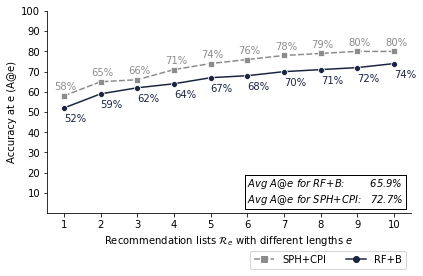

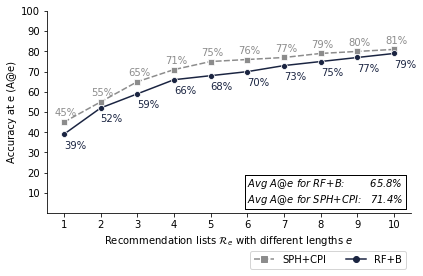

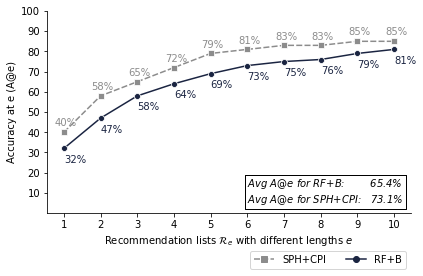

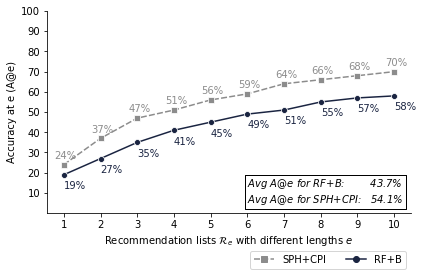

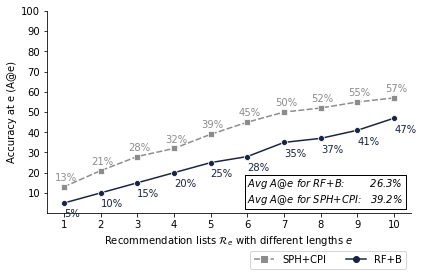

In [17]:
methods_ordered = ["SPH+CPI",
                   #"SPH",
                   "RF+B", 
                   #"CPI"
                  ]

palette = [sns.color_palette(palette='deep')[7], 
           #sns.color_palette(palette='muted')[1],
            sns.color_palette(palette="cubehelix")[0]]
def write_values_lineplot(df, ax):
    color_per_label = {x:c for x,c in zip(methods_ordered, palette)}

    for item, color in zip(df.groupby('Method'),palette):
        #item[1] is a grouped data frame
        for x,y,method, imbalance in item[1][['R_e','A@e','Method', 'imbalance']].values:
            y = np.mean(y)
            y_position = round(y)
            x_position = x
            if method == "SPH+CPI":

                y_position = y_position + 3
                x_position = x_position - 0.25
            else:
                y_position = y_position - 3
                if method == "SPH":
                    #if y_position == 33:
                        #y_position = y_position + 7
                        #print(y_position)
                    if imbalance == "high":
                        if(x==2 or x==3 or x==9 or x==10):
                            y_position += 7
                            x_position = x - 0.25
                        elif x==1:
                            y_position += 2
                    elif (imbalance == "normal" or imbalance == "low") and x==1:
                        y_position += 3
                        if imbalance == "normal":
                            y_position += 3
                    elif (imbalance == "low" and x==2) or (imbalance == "normal" and x>=3 and x <=4):
                        y_position +=7
                        x_position -= 0.25
                    x_position += 0.15

                if method == "CPI":
                    y_position = y_position - 3
                if method == "RF+B":
                    y_position = y_position - 4
            
            
            ax.text(x_position,y_position,f'{y:.0f}%', color=color_per_label[method])
        
        for imb in item[1][['imbalance']].values:
            #print(imb)
            ax.text(6, 5, r'$Avg~A@e$ for RF+B:       ' +
                    f' {round(rf_avg_a_at_e_per_degree[imb[0]],1)}% \n' + r'$Avg~A@e$ for SPH+CPI:  ' 
                    + f' {round(sph_cpi_avg_a_at_e_per_degree[imb[0]],1)}%',
                bbox={
                    'facecolor': 'white', 
                    'alpha': 1.0, 'pad':2}, style='italic')
            
            
degree_to_best_result = {}
merged_df = merged_df[merged_df["Method"]!= "CPI"]
merged_df = merged_df[merged_df["Method"] != "SPH"]
for imb in merged_df['imbalance'].unique():
    merged_df['Method'] = merged_df['Method'].apply(lambda x: 'SPH+CPI' if x == "Tailored Approach" else x)
    merged_df['Run'] = 1
    low_imb_df = merged_df[merged_df['imbalance'] == imb]
    best_result = low_imb_df[low_imb_df["Avg Acc SPH+CPI"] == low_imb_df["Avg Acc SPH+CPI"].max()]
    best_gini = best_result["gini"].values[0]
    #best_gini = 0.3
    best_p = best_result["p value"].values[0]
    #best_p = 0.8
    #best_run = best_result["Run"].values[0]
    best_run = 1
    best_max_info_loss = best_result['info loss'].values[0]
    #best_max_info_loss = 0.25
    
    degree_to_best_result[imb] = {'gini': best_gini, 'p': best_p, 'info loss': best_info_loss, 'run': best_run}

    best_ta_methods = low_imb_df[((low_imb_df["gini"] ==best_gini) & (low_imb_df["Run"] == best_run) &(low_imb_df['info loss'] == best_max_info_loss)& (low_imb_df["p value"] == best_p))]
    best_sph = low_imb_df[(low_imb_df['Method'] == 'SPH') & ( low_imb_df['info loss'] == best_max_info_loss)]
    best_rf = low_imb_df[low_imb_df['Method'] == 'RF+B'][0:10]
    best_cpi = low_imb_df[(low_imb_df['Method'] == 'CPI') & (low_imb_df['gini'] == 0.3) & (low_imb_df['p value'] == 0.8)][0:10]
    best_all_methods = pd.concat([best_ta_methods, best_rf, best_cpi, best_sph])
    best_all_methods
    #sns.set_style("darkgrid")
    #best_run_df['A@e'] = best_run_df['A@e'].apply(lambda x: x*100)
    
    ############################################################
    #### Use hardcoded results ################################
    best_all_methods = result[result["imbalance"] == imb]
    ############################################################
    
    ax = sns.lineplot(palette=palette, x="R_e", y="A@e", data=best_all_methods, hue="Method", style="Method", markers={"RF+B": "o", "SPH+CPI": "s",
                                                                                                                      # "SPH": "X"
                                                                                                                      }, hue_order=methods_ordered)
    write_values_lineplot(best_all_methods, ax)

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlabel(r'Recommendation lists $\mathcal{R}_e$ with different lengths $e$')
    ax.set_ylim(0, 100)
    ax.set_xticks(range(1,11))
    ax.set_yticks(range(10, 110,10))
    ax.set_ylabel('Accuracy at e (A@e)')

    plt.legend(bbox_to_anchor=(1, -0.3), loc='lower right', ncol=5)
    plt.tight_layout()
    plt.show()
    #plt.savefig(f"accuracy_{imb}_no_cpi.pdf")
    plt.close()

## Ergebnisse für Default

In [12]:
best_result_each_degree = pd.DataFrame()
#low_imb_df.head()
#frames = [very_low_imb_df, low_imb_df, normal_imb_df, high_imb_df, very_high_imb_df]

degree_to_best_result = {}
for imb in merged_df['imbalance'].unique():
    imb_df = merged_df[merged_df['imbalance'] == imb]
    best_run = 1    
    best_result = imb_df[(imb_df["Avg Acc SPH+CPI"] == imb_df["Avg Acc SPH+CPI"].max())]
    print(f"best run for imb degree {imb} is: {best_run}")
    best_gini = 0.3
    print(best_result["gini"].unique())
    best_p = 0.8
    print(best_result["p value"].unique())
    best_info_loss = 0.25
    # best result for SPH+CPI
    best_ta_methods = imb_df[(imb_df["gini"] ==best_gini) & (imb_df["info loss"] == best_info_loss) & (imb_df["Run"] == best_run) & (imb_df["p value"] == best_p) & (imb_df['Method'] == 'SPH+CPI')]
    best_result_each_degree = pd.concat([best_result_each_degree, best_ta_methods])
    
    
best_result_each_degree
best_result_each_degree['Method'] = best_result_each_degree['Method'].apply(lambda x: 'SPH+CPI' if x == "Tailored Approach" else x)
best_result_each_degree[(best_result_each_degree['R_e'] ==1) & (best_result_each_degree['imbalance'] == 'low')]
best_result_each_degree[(best_result_each_degree['R_e'] ==1)]
best_result_each_degree[['A@e', 'gini', 'p value', 'imbalance', 'info loss', 'Avg Acc SPH+CPI',]][(best_result_each_degree['R_e'] == 1) & (best_result_each_degree['Avg Acc SPH+CPI'] != np.NaN)].drop_duplicates().round(2)

best run for imb degree very_high is: 1
[0.4]
[0.8]
best run for imb degree high is: 1
[0.35]
[0.8]
best run for imb degree normal is: 1
[0.4]
[0.9]
best run for imb degree low is: 1
[0.35 0.4 ]
[0.8]
best run for imb degree very_low is: 1
[0.3  0.35 0.4 ]
[0.7 0.8 0.9]


,A@e,gini,p value,imbalance,info loss,Avg Acc SPH+CPI
50,56.00,0.3,0.8,very_high,0.25,71.60
50,44.00,0.3,0.8,high,0.25,67.30
50,33.33,0.3,0.8,normal,0.25,71.07
50,24.67,0.3,0.8,low,0.25,53.87
50,13.33,0.3,0.8,very_low,0.25,39.03


## Statistics for the best parameter Results

In [10]:
stats_merged_df = pd.DataFrame()
for imb in ['very_low', 'low', 'normal', 'high', 'very_high']:
    df = pd.read_csv(f'../imbalance_degree/{imb}/result_split/gini_stats_1.csv', delimiter=';', decimal=',')
    df['imbalance'] = imb
    stats_merged_df = pd.concat([df, stats_merged_df])
stats_merged_df.head()

,Unnamed: 0,CM Index,gini_parameter,p_parameter,gini,Training gini,gini SPH,gini CPI,Missing,Missing SPH,...,#Classes CPI,#Samples,#Samples SPH,#Samples CPI,#Features,#Features SPH,#Features CPI,SPH executed,CPI executed,imbalance
0,0,gini,0.2,0.70,0.571338,0.555371,0.37299,0.135486,23.988571,7.09171,...,6.722222,1050,77.827586,43.203704,100,81.931034,81.931034,9,25,very_high
1,0,gini,0.2,0.75,0.571338,0.555371,0.37299,0.124954,23.988571,7.09171,...,6.722222,1050,77.827586,43.666667,100,81.931034,81.931034,9,25,very_high
2,0,gini,0.2,0.80,0.571338,0.555371,0.37299,0.117207,23.988571,7.09171,...,6.722222,1050,77.827586,44.240741,100,81.931034,81.931034,9,25,very_high
3,0,gini,0.2,0.85,0.571338,0.555371,0.37299,0.115732,23.988571,7.09171,...,6.722222,1050,77.827586,44.240741,100,81.931034,81.931034,9,25,very_high
4,0,gini,0.2,0.90,0.571338,0.555371,0.37299,0.108413,23.988571,7.09171,...,6.722222,1050,77.827586,44.685185,100,81.931034,81.931034,9,25,very_high


In [14]:
stats_result = pd.DataFrame()
for imb in stats_merged_df['imbalance'].unique():
    best_result_dic = degree_to_best_result[imb]
    if imb == 'very_low':
        best_result_dic['gini'] = 0.25
    imb_stats = stats_merged_df[stats_merged_df['imbalance'] == imb]
    #imb_stats = imb_stats[(imb_stats['gini_parameter'] == best_result_dic['gini']) & (imb_stats['p_parameter'] == best_result_dic['p']) & (imb_stats['info loss'] == best_result_dic['info loss'])]
    imb_stats = imb_stats[(imb_stats['gini_parameter'] == best_result_dic['gini']) & (imb_stats['p_parameter'] == best_result_dic['p'])]

    stats_result = pd.concat([imb_stats, stats_result])

print(stats_result.columns)
stats_result = stats_result.round(2)
stats_result[['imbalance',
              'SPH executed', 'CPI executed',
              '#Samples SPH', '#Samples CPI','#Classes SPH', '#Classes CPI', '#Features SPH', '#Features CPI', 'Missing SPH', 'Missing CPI', 'gini SPH', 'gini CPI']]

Index(['Unnamed: 0', 'CM Index', 'gini_parameter', 'p_parameter', 'gini',
       'Training gini', 'gini SPH', 'gini CPI', 'Missing', 'Missing SPH',
       'Missing CPI', '#Classes', '#Classes SPH', '#Classes CPI', '#Samples',
       '#Samples SPH', '#Samples CPI', '#Features', '#Features SPH',
       '#Features CPI', 'SPH executed', 'CPI executed', 'imbalance'],
      dtype='object')


,imbalance,SPH executed,CPI executed,#Samples SPH,#Samples CPI,#Classes SPH,#Classes CPI,#Features SPH,#Features CPI,Missing SPH,Missing CPI,gini SPH,gini CPI
5,very_low,7,3,76.83,69.62,15.59,14.12,81.52,81.52,6.53,7.00,0.16,0.15
17,low,8,4,78.97,69.39,16.17,14.21,81.69,81.69,6.90,7.28,0.22,0.20
23,normal,6,5,71.21,64.62,12.21,10.41,81.28,81.28,6.35,6.73,0.29,0.23
1,high,8,23,79.55,46.48,13.69,7.63,81.69,81.69,6.91,7.13,0.33,0.13
22,very_high,9,10,77.83,58.74,12.52,9.31,81.93,81.93,7.09,7.41,0.37,0.24


In [23]:
def line_plot_write_imb_values(df):
    print(df["imbalance"].unique())
    df["imbalance"] = pd.Categorical(df["imbalance"], 
                      categories=["normal","low","very low","high", "very high"],
                      ordered=True)
    palette = sns.color_palette()[0:len(df["imbalance"].unique())]
    print(len(palette))
    print(df["imbalance"].unique())
    df = df.sort_values("imbalance")
    color_per_label = {x:c for x,c in zip(df["imbalance"].unique(), palette)}
    ax = sns.lineplot(x="R_e", y="A@e", hue="imbalance", data=df, markers=True, palette=palette)

    for item, color in zip(df.groupby('imbalance'),palette):
        #item[1] is a grouped data frame
        for x,y,imb in item[1][['R_e','A@e','imbalance']].values:
            ax.text(x,y,f'{y:.2f}', color=color_per_label[imb])

### Rework Attempts

In [9]:
import math
merged_df = pd.DataFrame()

#for max_info_loss in np.arange(0.1, 0.45, 0.05):
# info loss should now be stored in each csv file!
for imb in ['very_low', 'low', 'normal', 'high', 'very_high']:
    #max_info_loss = round(max_info_loss, 2)
    file_name = f'../RA/imbalance_degree/{imb}/result_split/gini_accuracy_all_runs.csv'
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name)
        df['imbalance'] = imb
        merged_df = pd.concat([df, merged_df])

    if imb == 'normal':
        print(merged_df[merged_df['imbalance'] == 'normal']['info loss'].unique())


merged_df["Method"] = merged_df["Method"].apply(lambda x: "SPH+CPI" if x=="Tailored Approach" else x)
merged_df['A@e'] = merged_df['A@e'] * 100
merged_df['Avg Acc SPH+CPI'] = merged_df['Avg Acc SPH+CPI'] * 100
#merged_df = merged_df[(merged_df['imbalance'] != 'normal') | (merged_df['info loss'] !=0.3)]
print(merged_df['info loss'].unique())
print(merged_df[merged_df['info loss'].isnull()])
print(merged_df[merged_df['imbalance'] == 'normal']['info loss'].unique())
print(merged_df[merged_df['Method'] == "RF+B"][['R_e', 'RA@e', 'imbalance']])

KeyError: 'imbalance'

In [8]:
best_result_each_degree = pd.DataFrame()
#low_imb_df.head()
#frames = [very_low_imb_df, low_imb_df, normal_imb_df, high_imb_df, very_high_imb_df]
for imb in merged_df['imbalance'].unique():
    imb_df = merged_df[merged_df['imbalance'] == imb]
    
    best_A_1_result = imb_df[ (imb_df['Method'] == "SPH+CPI")]['A@e'].max()

    print('------------------------------------------')
    print(imb)

    print(best_A_1_result)
    best_result = imb_df[(imb_df["Avg Acc SPH+CPI"] == imb_df["Avg Acc SPH+CPI"].max())]
    #best_result = imb_df[(imb_df["A@e"] == best_A_1_result) & (imb_df['Method'] == 'SPH+CPI') & (imb_df['R_e'] == 1)]
    
    best_gini = best_result["gini"].values[0]
    if imb == 'high':
        best_gini = 0.4
    best_p = best_result["p value"].values[0]
    print(best_result["gini"].unique())
    print(best_result["p value"].unique())
    #print(best_result["A@e"].unique())
    best_run = 1
    best_info_loss = best_result['info loss'].values[0]    
    print(best_result["info loss"].unique())

    print(f"best run for imb degree {merged_df['imbalance'].values[0]} is: {best_run}")
    # best result for SPH+CPI
    #print(best_result)
    best_ta_methods = imb_df[(imb_df["gini"] ==best_gini) & (imb_df["info loss"] == best_info_loss) & (imb_df["Run"] == best_run) & (imb_df["p value"] == best_p)]
    best_ta_methods = best_ta_methods[(best_ta_methods["Avg Acc SPH+CPI"] == best_ta_methods["Avg Acc SPH+CPI"].max())]

    #print(best_ta_methods)
    best_result_each_degree = pd.concat([best_result_each_degree, best_ta_methods])
    
    
best_result_each_degree
best_result_each_degree[ (best_result_each_degree['imbalance'] == 'low')]
best_result_each_degree["imbalance"] = pd.Categorical(best_result_each_degree["imbalance"], categories=["very_low","low","normal","high", "very_high"], ordered=True)
best_result_each_degree[['A@e','RA@e', 'gini', 'p value', 'imbalance', 'info loss', 'Avg Acc SPH+CPI','R_e']][(best_result_each_degree['R_e'].isin([1,4,5,6,10])) ].drop_duplicates().round(2).sort_values(['R_e','imbalance'])

------------------------------------------
very_high
80.66666666666666
[0.4]
[0.8]
[0.25]
best run for imb degree very_high is: 1
------------------------------------------
high
80.0
[0.35]
[0.8]
[0.25]
best run for imb degree very_high is: 1
------------------------------------------
normal
86.33333333333333
[0.4]
[0.9]
[0.25]
best run for imb degree very_high is: 1
------------------------------------------
low
69.66666666666667
[0.35 0.4 ]
[0.8]
[0.25]
best run for imb degree very_high is: 1
------------------------------------------
very_low
57.333333333333336
[0.3  0.35 0.4 ]
[0.7 0.8 0.9]
[0.25]
best run for imb degree very_high is: 1


KeyError: "['RA@e'] not in index"

### Default RAs

In [16]:
best_result_each_degree = pd.DataFrame()
#low_imb_df.head()
#frames = [very_low_imb_df, low_imb_df, normal_imb_df, high_imb_df, very_high_imb_df]

degree_to_best_result = {}
for imb in merged_df['imbalance'].unique():
    imb_df = merged_df[merged_df['imbalance'] == imb]
    best_run = 1    
    best_result = imb_df[(imb_df["Avg Acc SPH+CPI"] == imb_df["Avg Acc SPH+CPI"].max())]
  
    print(f"best run for imb degree {imb} is: {best_run}")
    best_gini = best_result["gini"].values[0]
    print(best_result["gini"].unique())
    best_p = best_result["p value"].values[0]
    print(best_result["p value"].unique())
    best_info_loss = best_result["info loss"].values[0]
    # best result for SPH+CPI
    best_ta_methods = imb_df[(imb_df["gini"] ==best_gini) & (imb_df["info loss"] == best_info_loss) & (imb_df["Run"] == best_run) & (imb_df["p value"] == best_p) & (imb_df['Method'] == 'SPH+CPI')]
    best_result_each_degree = pd.concat([best_result_each_degree, best_ta_methods])
    
    best_SPH = imb_df[(imb_df["info loss"] == best_info_loss) & (imb_df["Method"] == "SPH")]
    best_result_each_degree = pd.concat([best_result_each_degree, best_SPH])
    
    best_RF = imb_df[(imb_df["Method"] == "RF+B")]
    best_result_each_degree = pd.concat([best_result_each_degree, best_RF])
    
best_result_each_degree
best_result_each_degree['Method'] = best_result_each_degree['Method'].apply(lambda x: 'SPH+CPI' if x == "Tailored Approach" else x)
best_result_each_degree[(best_result_each_degree['R_e'] ==1) & (best_result_each_degree['imbalance'] == 'low')]
best_result_each_degree[(best_result_each_degree['R_e'] ==1)]
best_result_each_degree[['A@e','RA@e', 'Method', "imbalance"]][(best_result_each_degree['R_e'] == 10)].drop_duplicates().round(2)

best run for imb degree very_high is: 1
[0.4]
[0.8]
best run for imb degree high is: 1
[0.4]
[0.85]
best run for imb degree normal is: 1
[0.4]
[0.9]
best run for imb degree low is: 1
[0.4  0.35]
[0.7]
best run for imb degree very_low is: 1
[0.3  0.35 0.4 ]
[0.7  0.8  0.85]


,A@e,RA@e,Method,imbalance
219,80.00,1.80,SPH+CPI,very_high
9,79.00,1.88,SPH,very_high
19,77.00,2.12,RF+B,very_high
259,84.00,2.50,SPH+CPI,high
9,84.00,2.35,SPH,high
19,78.00,2.75,RF+B,high
39,78.33,2.34,SPH+CPI,normal
9,78.67,2.38,SPH,normal
19,75.33,2.85,RF+B,normal
199,67.67,3.22,SPH+CPI,low


In [19]:
ax = normal_df.plot(x="R_e", y="A@e", legend=True)
ax.set_ylim(15, 85)
ax2 = ax.twinx()
normal_df.plot(x="R_e", y="RA@e", ax=ax2, legend=True, color="r")
ax2.set_ylim(1,3)
#ax.figure.legend()
ax.set_title('RA@e and A@e für normal default')
plt.show()

NameError: name 'normal_df' is not defined

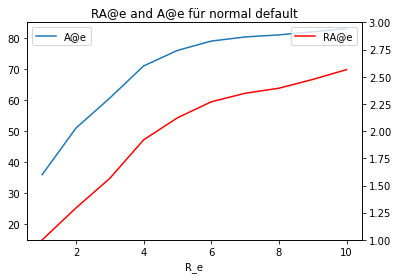

In [29]:
ax = normal_df.plot(x="R_e", y="A@e", legend=True)
ax.set_ylim(15, 85)
ax2 = ax.twinx()
normal_df.plot(x="R_e", y="RA@e", ax=ax2, legend=True, color="r")
ax2.set_ylim(1,3)
#ax.figure.legend()
ax.set_title('RA@e and A@e für normal default')
plt.show()